In [1]:
import numpy as np
import pandas as pd

# 定位到上一级目录
import os
# 在 Jupyter Notebook 中 __file__ 不存在，需改用 os.getcwd() 获取当前工作目录
# 如果脚本和 Notebook 同目录，可直接用下面这句；否则请手动指定路径
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
# 读取训练集和测试集
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#查看训练集和测试集的基本信息
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             7206 non-null   float64
 11  E10                            7984 non-null   float64
 12  E11                            7984 non-null   f

In [3]:
#查看训练集forward_returns列的统计信息
train['forward_returns'].describe()

count    8990.000000
mean        0.000469
std         0.010551
min        -0.039754
25%        -0.004324
50%         0.000659
75%         0.005900
max         0.040661
Name: forward_returns, dtype: float64

<Axes: ylabel='Frequency'>

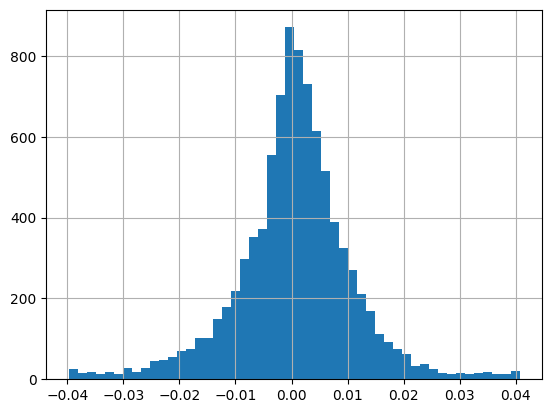

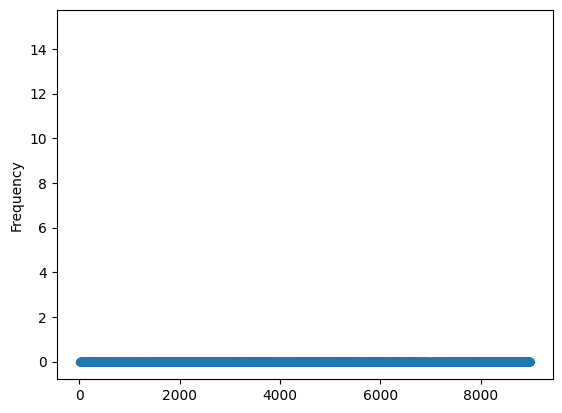

In [4]:
#画出forward_returns的直方图
train['forward_returns'].hist(bins=50)
#画出forward_returns的散点图，x轴为date_id，y轴为forward_returns
train.plot.scatter(x='date_id', y='forward_returns')
#查看训练集最后180个交易日的forward_returns的分布
train.tail(180)['forward_returns'].plot.hist(bins=100)

In [5]:

# 将缺失值数量大于0的列筛选出来
missing_cols = train.tail(3000).isnull().sum()[train.tail(3000).isnull().sum() > 0]
missing_cols

E7     979
V10     59
dtype: int64

In [6]:

# 现在导入main模块
from XGBoost预测模块.main import load_and_preprocess_data

X_train_returns, X_test_returns, y_train_returns, y_test_returns, feature_columns_returns = load_and_preprocess_data('train.csv',target_mode='returns')
X_train_volatility, X_test_volatility, y_train_volatility, y_test_volatility, feature_columns_volatility = load_and_preprocess_data('train.csv',target_mode='volatility')
X_train_probability, X_test_probability, y_train_probability, y_test_probability, feature_columns_probability = load_and_preprocess_data('train.csv',target_mode='probability')

正在加载数据: train.csv
原始数据形状: (8990, 98)
正在创建滞后特征...
创建滞后特征后的数据形状: (8990, 101)
删除缺失值后的数据形状: (2021, 101)
目标变量模式: 收益率预测 (forward_returns)
训练集大小: 1769天
测试集大小: 252天（最后252天）
特征维度: 97
目标变量模式: returns
滞后特征已添加: lagged_forward_returns, lagged_risk_free_rate, lagged_market_forward_excess_returns
正在加载数据: train.csv
原始数据形状: (8990, 98)
正在创建滞后特征...
创建滞后特征后的数据形状: (8990, 101)
删除缺失值后的数据形状: (2021, 101)
目标变量模式: 波动率预测 (当日波动率)
训练集大小: 1769天
测试集大小: 252天（最后252天）
特征维度: 97
目标变量模式: volatility
滞后特征已添加: lagged_forward_returns, lagged_risk_free_rate, lagged_market_forward_excess_returns
正在加载数据: train.csv
原始数据形状: (8990, 98)
正在创建滞后特征...
创建滞后特征后的数据形状: (8990, 101)
删除缺失值后的数据形状: (2021, 101)
目标变量模式: 上涨概率预测 (0=下跌, 1=上涨)
训练集大小: 1769天
测试集大小: 252天（最后252天）
特征维度: 97
目标变量模式: probability
滞后特征已添加: lagged_forward_returns, lagged_risk_free_rate, lagged_market_forward_excess_returns


正在进行特征筛选，选择前85个重要特征
特征筛选完成，选择的特征: ['I9', 'P5', 'P9', 'V9', 'V13', 'P2', 'lagged_forward_returns', 'V10', 'S1', 'V5', 'M14', 'E3', 'M9', 'M2', 'V2', 'P8', 'S2', 'S6', 'E2', 'V12', 'S10', 'I8', 'S7', 'V7', 'M4', 'P13', 'P6', 'E19', 'I4', 'S5', 'S9', 'M11', 'S3', 'I1', 'V1', 'E14', 'P4', 'S8', 'S4', 'M10', 'V6', 'M13', 'lagged_risk_free_rate', 'E17', 'I7', 'lagged_market_forward_excess_returns', 'M1', 'M12', 'I2', 'M3', 'M6', 'I3', 'S11', 'S12', 'P7', 'P12', 'P10', 'E7', 'M7', 'E16', 'P11', 'I6', 'D7', 'M8', 'M17', 'M18', 'M16', 'V3', 'V8', 'E8', 'E4', 'M15', 'P3', 'V4', 'E5', 'P1', 'E10', 'V11', 'E9', 'M5', 'I5', 'E18', 'E20', 'E12', 'E13']


d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from fo

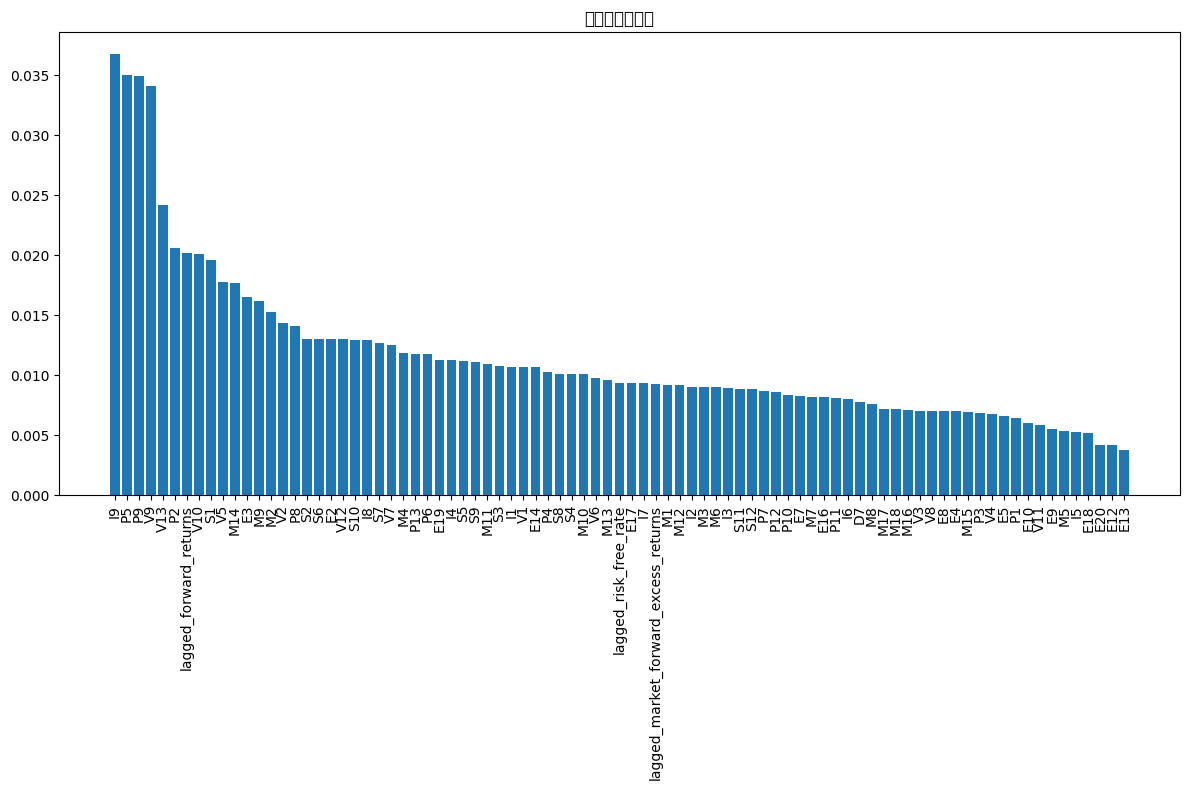

In [7]:
from XGBoost预测模块.main import feature_selection

#取大于0.05重要性的值，大约是85个特征
X_train_returns_selected, X_test_returns_selected, selected_features_returns = feature_selection(X_train_returns, X_test_returns, y_train_returns, feature_columns_returns,top_n=85)

正在进行特征筛选，选择前30个重要特征
特征筛选完成，选择的特征: ['V7', 'E19', 'M11', 'I6', 'I5', 'P11', 'P6', 'I9', 'I7', 'V10', 'S4', 'M18', 'V1', 'V11', 'M1', 'I3', 'V3', 'lagged_market_forward_excess_returns', 'M10', 'E7', 'lagged_forward_returns', 'V13', 'M12', 'V5', 'M17', 'M2', 'E4', 'M3', 'V9', 'M13']


d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from fo

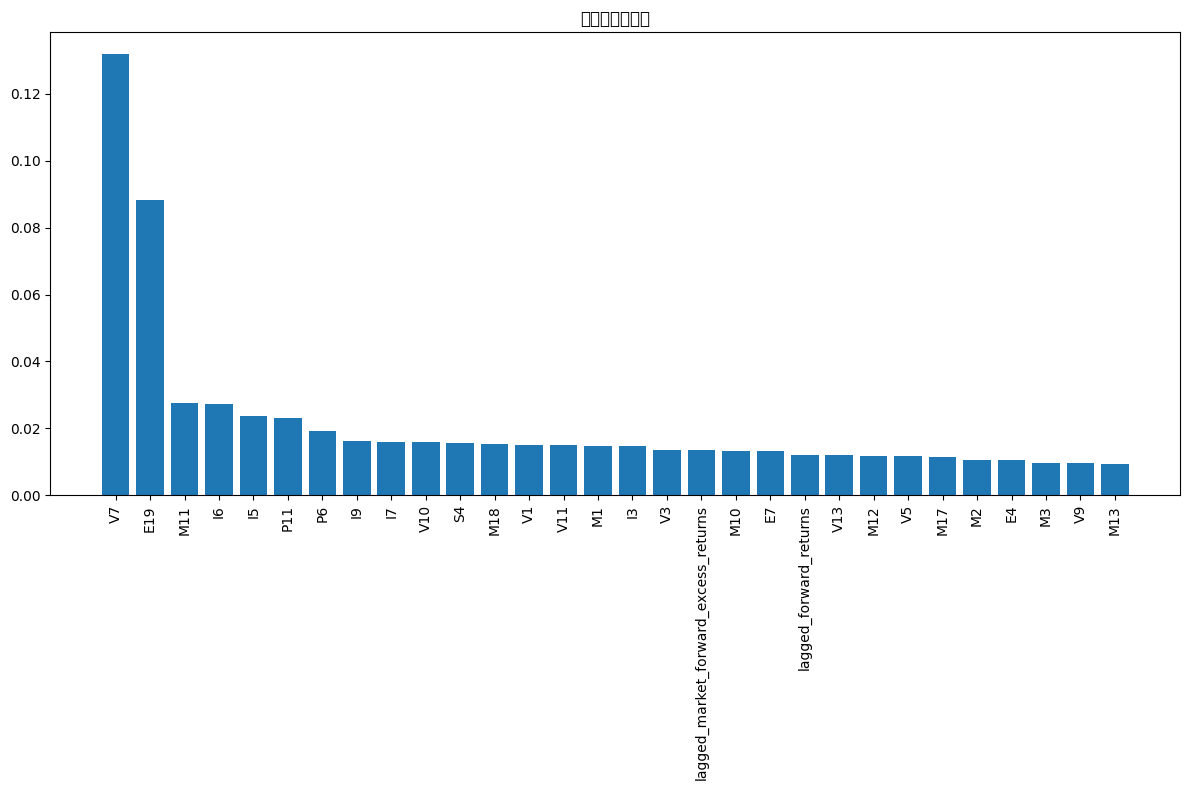

In [8]:
X_train_volatility_selected, X_test_volatility_selected, selected_features_volatility = feature_selection(X_train_volatility, X_test_volatility, y_train_volatility, feature_columns_volatility,top_n=30)

正在进行特征筛选，选择前90个重要特征
特征筛选完成，选择的特征: ['V9', 'lagged_market_forward_excess_returns', 'V3', 'M10', 'P9', 'P5', 'E18', 'P10', 'M18', 'P7', 'V6', 'I4', 'P13', 'S6', 'M17', 'S7', 'P8', 'V5', 'M9', 'S1', 'P6', 'M12', 'V10', 'M8', 'S9', 'S5', 'M5', 'M4', 'I3', 'I6', 'S2', 'P12', 'M16', 'M13', 'P3', 'E4', 'I2', 'P4', 'S11', 'V7', 'V12', 'V13', 'V2', 'S12', 'V1', 'S10', 'P11', 'M3', 'E2', 'M15', 'I8', 'P1', 'M2', 'E9', 'E3', 'M11', 'I1', 'E7', 'E20', 'E15', 'E14', 'E6', 'E16', 'lagged_forward_returns', 'I9', 'V11', 'V8', 'M14', 'V4', 'M6', 'E5', 'E8', 'M1', 'S8', 'I7', 'S4', 'E19', 'E13', 'P2', 'lagged_risk_free_rate', 'S3', 'E12', 'I5', 'E11', 'D5', 'M7', 'E10', 'D7', 'E1', 'D9']


d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\XGBoost预测模块\main.py:145: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from fo

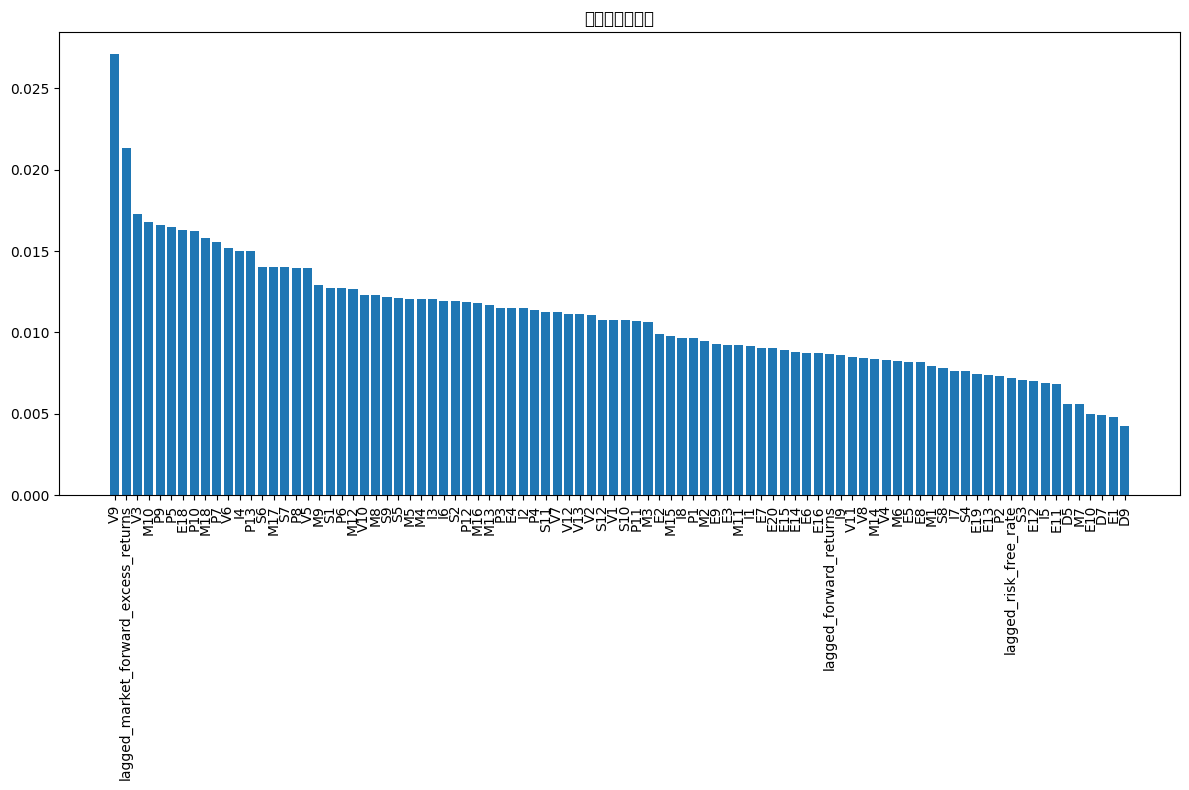

In [9]:
X_train_probability_selected, X_test_probability_selected, selected_features_probability = feature_selection(X_train_probability, X_test_probability, y_train_probability, feature_columns_probability,top_n=90)

In [10]:
# 使用贝叶斯优化进行超参数调优
from XGBoost预测模块.main import hyperparameter_tuning

best_params_return = hyperparameter_tuning(X_train_returns_selected, y_train_returns, task_type='return')
best_params_volatility = hyperparameter_tuning(X_train_volatility_selected, y_train_volatility, task_type='volatility')
best_params_direction = hyperparameter_tuning(X_train_probability_selected, y_train_probability, task_type='direction')


正在进行贝叶斯优化超参数调优... 任务类型: return
开始贝叶斯优化搜索...
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.6551
Function value obtained: 0.0082
Current minimum: 0.0082
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.4556
Function value obtained: 0.0082
Current minimum: 0.0082
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.5038
Function value obtained: 0.0082
Current minimum: 0.0082
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.3059
Function value obtained: 0.0082
Current minimum: 0.0082
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1765
Function value obtained: 0.0082
Current minimum

In [11]:
# 使用最优参数训练模型。
from XGBoost预测模块.main import train_xgboost_model,optimize_investment_params
return_model = train_xgboost_model(
    X_train=X_train_returns_selected,
    y_train=y_train_returns,
    params=best_params_return
)

volatility_model = train_xgboost_model(
    X_train=X_train_volatility_selected,
    y_train=y_train_volatility,
    params=best_params_volatility
)
direction_model = train_xgboost_model(
    X_train=X_train_probability_selected,
    y_train=y_train_probability,
    params=best_params_direction
)


正在训练XGBoost模型...
XGBoost模型训练完成
正在训练XGBoost模型...
XGBoost模型训练完成
正在训练XGBoost模型...
XGBoost模型训练完成


In [28]:
# 运用模型进行预测
y_pred_returns = return_model.predict(X_test_returns_selected)
y_pred_volatility = volatility_model.predict(X_test_volatility_selected)
# 涨跌输出概率
y_pred_probability = direction_model.predict(X_test_probability_selected)





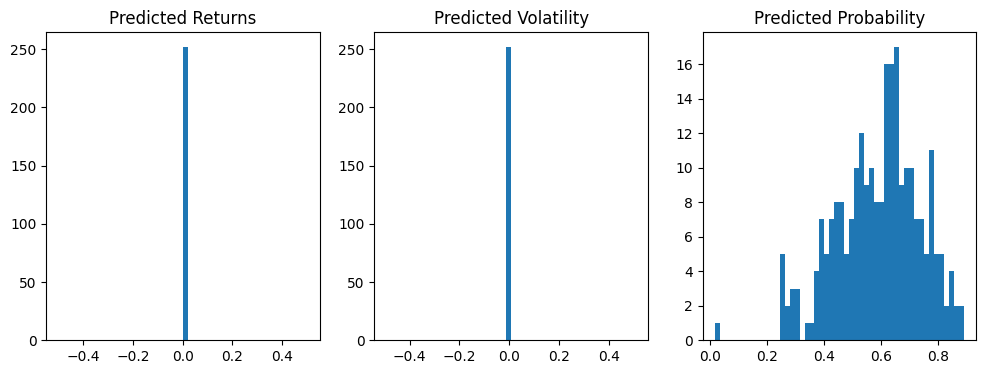

In [29]:
from matplotlib import pyplot as plt
#画出上述三个y的分布图
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(y_pred_returns, bins=50)
plt.title('Predicted Returns')
plt.subplot(1, 3, 2)
plt.hist(y_pred_volatility, bins=50)
plt.title('Predicted Volatility')
plt.subplot(1, 3, 3)
plt.hist(y_pred_probability, bins=50)
plt.title('Predicted Probability')
plt.show()

In [23]:
len(y_pred_returns)
len(y_pred_volatility)
len(y_pred_probability)


252

In [16]:
len(test_data)

252

In [17]:
# 测试数据是训练数据的最后252天
test_size = 252
test_data = train[-test_size:]

# 选择持仓的最优超参数α和β
optimization_result = optimize_investment_params(
    return_prediction=y_pred_returns,
    volatility_prediction=y_pred_volatility,
    up_probability=y_pred_probability,
    test_data = test_data
)
print(optimization_result)

开始优化投资比例函数超参数 alpha 和 beta...
alpha 搜索范围: 0.500 到 2.400，共 20 个值
beta 搜索范围: 0.001 到 0.049，共 25 个值
总共需要测试 500 种参数组合
进度: 50/500 (10.0%) - 当前最佳评分: -inf
进度: 100/500 (20.0%) - 当前最佳评分: -inf
进度: 150/500 (30.0%) - 当前最佳评分: -inf


d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\scores_evaluation.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution['position'] = submission['prediction']
d:\CodeingWorkPlace\VScodeWorkplace\Hull Tactical - Market Prediction\scores_evaluation.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution['strategy_returns'] = solution['risk_free_rate'] * (1 - solution['position']) + solution['position'] * solution['forward_returns']
d:\CodeingWorkPlace\VScodeWorkplace\Hull T

进度: 200/500 (40.0%) - 当前最佳评分: -inf
进度: 250/500 (50.0%) - 当前最佳评分: -inf
进度: 300/500 (60.0%) - 当前最佳评分: -inf
进度: 350/500 (70.0%) - 当前最佳评分: -inf
进度: 400/500 (80.0%) - 当前最佳评分: -inf
进度: 450/500 (90.0%) - 当前最佳评分: -inf
进度: 500/500 (100.0%) - 当前最佳评分: -inf

超参数优化完成！


TypeError: unsupported format string passed to NoneType.__format__